# Microsoft Graph Security API and Azure Sentinel
Demonstrating use of the [Microsoft Graph Security API](https://aka.ms/graphsecuritydocs) and drilling into data with [AzureSentinel](https://azure.microsoft.com/services/azure-sentinel/).


[ianhelle@microsoft.com](mailto:ianhelle@microsoft.com)

@ianhellen (Twitter/LinkedIn)

## What is a Jupyter Notebook?

In [117]:
for count in range(1,6):
    print('geen eggs and spam ' * count )

geen eggs and spam 
geen eggs and spam geen eggs and spam 
geen eggs and spam geen eggs and spam geen eggs and spam 
geen eggs and spam geen eggs and spam geen eggs and spam geen eggs and spam 
geen eggs and spam geen eggs and spam geen eggs and spam geen eggs and spam geen eggs and spam 


In [116]:
print("hello")

hello


## Why Jupyter?

- Data persistence, repeatability and backtracking in a single shareable document
- Full scripting and programming environment
- Ability to join data from external sources
- Access to a wide variety of libraries that bring capabilities such as machine/deep learning,
  advanced data manipulation and visualization.

<a id="check_init"></a>
## Initialize Libraries
If the following cell indicates that initialization is needed please go to and run this cell:



In [118]:
from IPython.display import display, HTML, Markdown
if 'MicrosoftGraphSecurityAPI' not in dir():
    display(Markdown('Please run the Notebook intialization cells before continuing</h3>'))
    display(Markdown('[Initialization](#initialization)'))
else:
    display(Markdown('Notebook imports OK'))

Notebook imports OK

<a id='authenticate'></a>
## Authenticate
---
### Microsoft Graph Security API

In [119]:
# Graph credentials
appId = get_secret('GRAPHSEC_DEMO_appId')
appSecret = get_secret('GRAPHSEC_DEMO_appSecret') 
tenantId = get_secret('GRAPHSEC_DEMO_tenantId')
vt_api_key = get_secret('VT_API_KEY')

MsftGraphSec_api = MicrosoftGraphSecurityAPI(tenantId, appId, appSecret, vt_api_key)
MsftGraphSec_api.set_debug_output()

Connected.


### Azure Sentinel

In [120]:
# Azure Sentinel Workspace
TENANT_ID = '72f988bf-86f1-41af-91ab-2d7cd011db47'
WORKSPACE_ID = '52b1ab41-869e-4138-9e40-2a4457f09bf0'

nbtools.kql.load_kql_magic()
%kql loganalytics://code().tenant(TENANT_ID).workspace(WORKSPACE_ID)
if nbtools.kql._is_kqlmagic_loaded():
    print("Connected.")

Connected.


## Get Alerts from Microsoft Graph Security API

Let's query the most recent 25 alerts high severity alertsusing the OData TOP keyword. The `$top=5` query will return 5 of the most recent alerts from *each* [Microsoft Graph Security alert provider](https://aka.ms/graphsecurityalerts). 

In [122]:
# get the high-severity alerts and select a few columns 
graph_query = """
$select=createdDateTime,category,title,description,id,severity,status,vendorInformation
&$filter=Severity eq 'High' 
"""
graph_query = graph_query.replace('\n','')
graph_alerts_df = MsftGraphSec_api.alerts(filterstr=graph_query)
graph_alerts_df

https://graph.microsoft.com/v1.0/security/alerts?%24select=createdDateTime%2Ccategory%2Ctitle%2Cdescription%2Cid%2Cseverity%2Cstatus%2CvendorInformation&%24filter=Severity+eq+%27High%27+


,category,createdDateTime,description,id,severity,status,title,vendorInformation.provider,vendorInformation.providerVersion,vendorInformation.subProvider,vendorInformation.vendor
0,threat,2019-04-20T15:11:31Z,Traps: Malware Blocked,5AE9CC76-B587-4401-95C7-A8C878B7FFA5,high,newAlert,Traps: Malware Blocked,Palo Alto Networks,5.0,Traps,Palo Alto Networks
1,vulnerability,2019-04-20T15:58:31Z,Vulnerability detected: Microsoft Windows Shell Validation Remote Code Execution Vulnerability,8B9A013D-4079-4B20-9014-0B9DCB558455,high,newAlert,threat: vulnerability 35993,Palo Alto Networks,8.1,NGFW,Palo Alto Networks
2,threat,2019-04-20T15:33:15Z,Traps: Malware Blocked,BC9DBC0C-A72E-4F65-A197-A333318CA14E,high,newAlert,Traps: Malware Blocked,Palo Alto Networks,5.0,Traps,Palo Alto Networks
3,data,2019-04-17T10:16:36Z,Data Filtering Alert: Document labelled Confidential file transfer detected,53C7E3B0-8470-424C-BD40-2C9C3F9EFB81,high,newAlert,Data Filtering Alert,Palo Alto Networks,None,NG Firewall,Palo Alto Networks
4,wildfire,2019-04-15T19:26:59Z,Wildfire prevention event block,399796F2-9395-49B2-A6AB-9E02162313D8,high,newAlert,Wildfire prevention threat,Palo Alto Networks,8.1,NG Firewall,Palo Alto Networks
5,exploit,2019-04-18T15:37:00Z,"A process suspiciously tried to access the export address table (EAT) to look for potentially useful APIs. This might indicate an exploitation attempt. The process svchost.exe, with process ID 404, tried accessing the Export Address table for module C:\\Windows\\SYSTEM32\\ntdll.dll and was blocked",0F72C58F-1D01-4284-BB32-C53DD45B5C01,high,newAlert,Exploit Guard blocked dynamic code execution,Windows Defender ATP,3.10.2,DeviceGuard,Microsoft
6,MANUAL,2019-04-16T08:13:00Z,"SQL Injection, Cross-Site Scripting. We observed the following suspicious value enter the application through the HTTP Request Parameter ""userid"":POST /WebGoat/SqlInjection/attack5b HTTP/1.0 userid=4+OR+1%3D1 This value was again observed altering the meaning of the SQL query executed within org...",257F2933-A145-4061-9464-2D964A91EB91,high,newAlert,Active attack EXPLOITED in QA,Contrast Security,1.0,,Contrast Security
7,Malicious_IP,2019-04-20T14:36:57.2738949Z,Network traffic analysis indicates that your devices communicated with what might be a Command and Control center for a malware of type Dridex. Dridex is a banking trojan family that steals credentials of online banking websites. Dridex is typically distributed via phishing emails with Microsoft...,0F73E38F-BA78-49F7-A71C-0A37D329E808,high,newAlert,Network communication with a malicious IP,Azure Security Center,3.0,None,Microsoft
8,DoubleExtension,2019-04-15T22:05:56.582321Z,Analysis of host data indicates an execution of a process with a suspicious double extension.\r\nThis extension may trick users into thinking files are safe to be opened and might indicate the presence of malware on the system.,4F12F545-97B2-420E-8FA9-2EB8FD2D6214,high,newAlert,Suspicious double extension file executed,Azure Security Center,3.0,None,Microsoft
9,ShadowCopyDelete,2019-04-15T20:11:10.6052419Z,"Analysis of host data has detected a shadow copy deletion activity on the resource.\r\nVolume Shadow Copy (VSC) is an important artifact that stores data snapshots.\r\nSome malware and specifically Ransomware, targets VSC to sabotage backup strategies.",BA1AFA7C-206D-4450-988E-D2795D5259F5,high,newAlert,Suspicious Volume Shadow Copy Activity,Azure Security Center,3.0,None,Microsoft


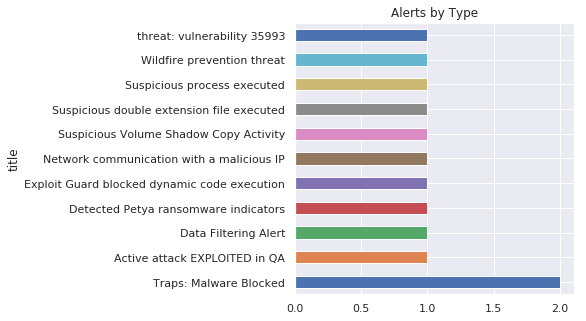

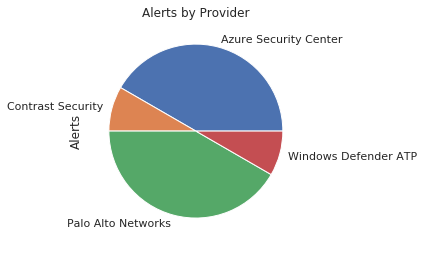

In [123]:
# let's group them by title and count their frequency
%matplotlib inline
(graph_alerts_df[['id','title']]
 .groupby('title')
 .count()
 .rename(index=str, columns={"id":"Alert Count"})
 .sort_values(['Alert Count'], ascending=False)
 .plot.barh(y=0, figsize=(5, 5), legend=False, title='Alerts by Type'))

# and by provider
(graph_alerts_df[['id','vendorInformation.provider']]
 .groupby('vendorInformation.provider')
 .count()
 .rename(index=str, columns={"id":"Alerts", 'vendorInformation.provider': 'provider'})
 .plot.pie(y=0, legend=False, title='Alerts by Provider'));


In [124]:
MsftGraphSec_api.set_debug_output(False)
graph_alerts_df = MsftGraphSec_api.alerts(filterstr="$filter=Severity eq 'High'")
display(pd.DataFrame(data=graph_alerts_df['networkConnections'].loc[0]).T)


,0
applicationName,None
destinationAddress,54.243.225.218
destinationDomain,None
destinationPort,3712
destinationUrl,None
direction,None
domainRegisteredDateTime,None
localDnsName,None
natDestinationAddress,None
natDestinationPort,None


In [125]:
MsftGraphSec_api.alerts(hostfqdn = 'lap-pattif.M365x594651.onmicrosoft.com')[['title', 'description', 
                                                                              'category', 'status', 
                                                                              'vendorInformation.provider']]

,title,description,category,status,vendorInformation.provider
0,Managed device lap-pattif.M365x594651.onmicrosoft.com is not compliant,No compliance policies have been assigned,nonCompliantDevice,newAlert,Intune
1,Network communication with a malicious IP,Network traffic analysis indicates that your devices communicated with what might be a Command and Control center for a malware of type Dridex. Dridex is a banking trojan family that steals credentials of online banking websites. Dridex is typically distributed via phishing emails with Microsoft...,Malicious_IP,newAlert,Azure Security Center
2,Suspicious process executed,"Machine logs indicate that the suspicious process: 'c:\users\pattif\appdata\local\temp\mimikatz.exe' was running on the machine, often associated with attacker attempts to access credentials.'",KnownCredentialAccessTools,newAlert,Azure Security Center
3,Modified system binary discovered,Crash dump analysis detected system module modification within a crash dump from the process identified in this alert.,Modified system binary discovered,newAlert,Azure Security Center


## Azure Sentinel

In [126]:
security_alert = None
def show_full_alert(selected_alert):
    global security_alert
    security_alert = nbtools.SecurityAlert(alert_select.selected_alert)
    nbtools.disp.display_alert(security_alert, show_entities=True)
    
alert_id ='2518521557014927413_daa18e53-ab1d-4d7d-8c4f-bcb86f75fd5f'
alert_wgt = nbtools.GetSingleAlert(max_lookback=100, action=show_full_alert)
alert_wgt._w_target_alert.value = alert_id
alert_wgt.display()

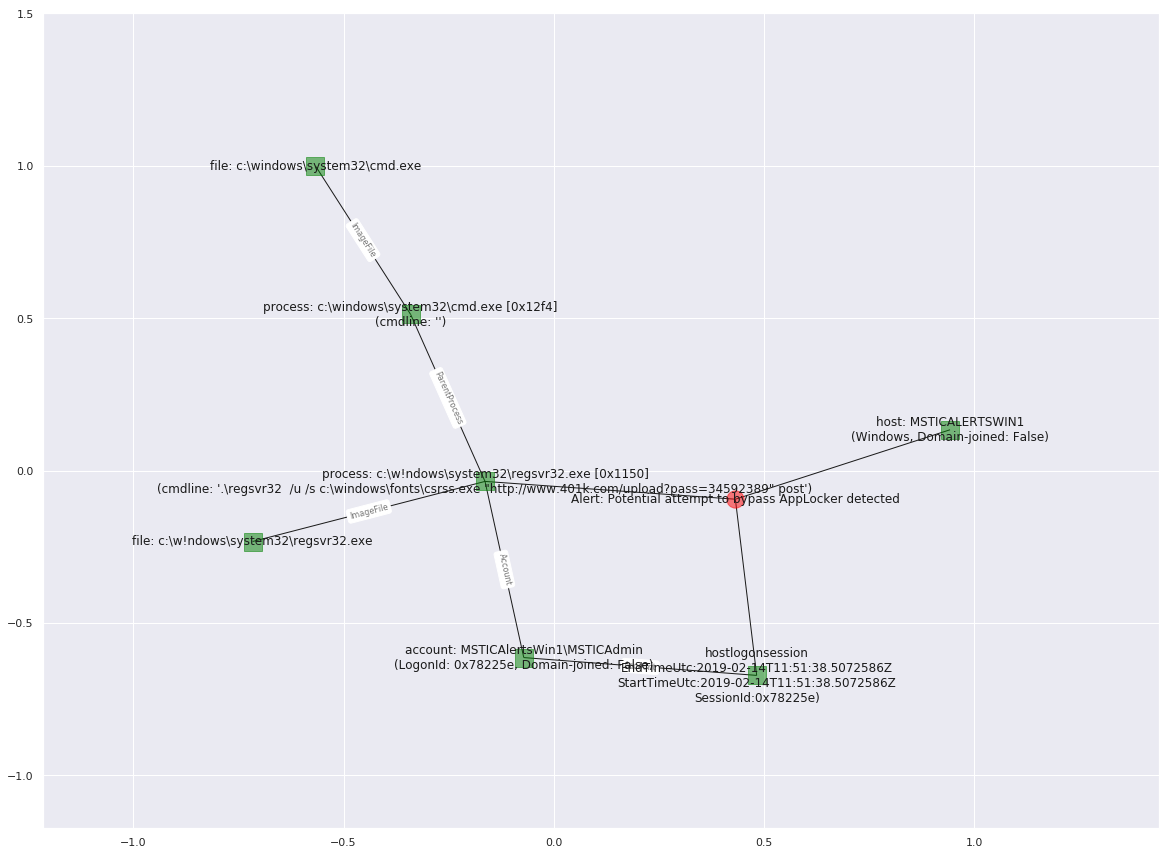

In [127]:
# Draw the graph using Networkx/Matplotlib
%matplotlib inline
alertentity_graph = nbtools.create_alert_graph(security_alert)
nbdisp.draw_alert_entity_graph(alertentity_graph, width=20)

## Alert Process Tree

In [128]:
# set the origin time to the time of our alert
query_times = nbtools.QueryTime(units='minute', origin_time=security_alert.origin_time, auto_display=True)

HTML(value='<h4>Set query time boundaries</h4>')

In [129]:
# run the query
process_tree = qry.get_process_tree(provs=[query_times, security_alert])

if len(process_tree) > 0:
    # Print out the text view of the process tree
    display(HTML(display_process_tree(process_tree)))
    
# Show timeline of events
if process_tree is not None and not process_tree.empty:
    nbdisp.display_timeline(data=process_tree, alert=security_alert, 
                            title='Alert Process Session', height=250)

Loading BokehJS ...

Alert start time =  2019-02-14 11:51:38


## Check for IOCs in Process Session

In [130]:
ioc_extractor = sectools.IoCExtract()

ioc_df = ioc_extractor.extract(data=process_tree, 
                               columns=['CommandLine'], 
                               os_family=security_alert.os_family,
                               ioc_types=['ipv4', 'ipv6', 'dns', 'url',
                                          'md5_hash', 'sha1_hash', 'sha256_hash'])
if len(ioc_df):
    display(HTML("<h3>IoC patterns found in process tree.</h3>"))
    display(ioc_df)

,IoCType,Observable,SourceIndex
0,dns,www.401k.com,0
1,url,http://www.401k.com/upload?pass=34592389,0


## Network Traffic

In [131]:
host_entities = [e for e in security_alert.entities if isinstance(e, nbtools.Host)]
if len(host_entities) == 1:
    inv_host_entity = host_entities[0]
    host_name = inv_host_entity.HostName

    df_az, df_oms = lookup_host_ip_info(inv_host_entity.HostName)
    add_ip_data_to_host(inv_host_entity, df_az, df_oms)

    display(Markdown('### Updated Host Entity with IP Addresses\n'))
    print(inv_host_entity)

Looking for IP addresses of  MSTICALERTSWIN1


### Updated Host Entity with IP Addresses


{ 'AdditionalData': { 'OSMajorVersion': '10',
                      'OSMinorVersion': '0',
                      'SourceComputerId': '263a788b-6526-4cdc-8ed9-d79402fe4aa0'},
  'HostName': 'MSTICALERTSWIN1',
  'NetBiosName': 'MSTICALERTSWIN1',
  'OSFamily': 'Windows',
  'Type': 'host',
  'private_ips': [{"Address": "10.0.3.5", "Type": "ipaddress"}],
  'public_ips': [ {"Address": "40.76.43.124", "Location": {"CountryCode": "US", "CountryName": "United States", "State": "Virginia", "City": "Washington", "Longitude": -78.1704, "Latitude": 38.7163, "Type": "geolocation"}, "Type": "ipaddress"}]}


In [132]:
ip_q_times = nbtools.QueryTime(label='Set time bounds for network queries',
                           units='day', max_before=48, before=6, after=2, 
                           max_after=24, origin_time=security_alert.StartTimeUtc)
ip_q_times.display()

HTML(value='<h4>Set time bounds for network queries</h4>')

getting data...


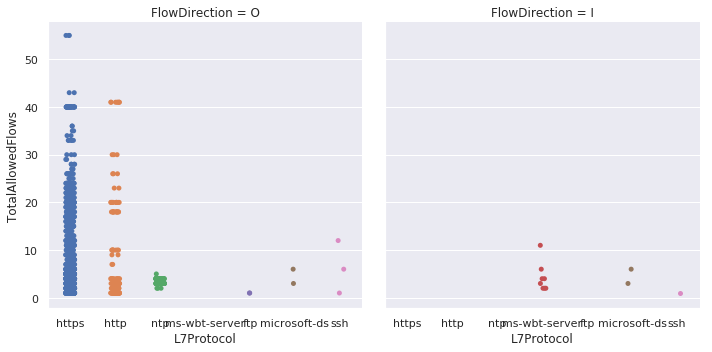

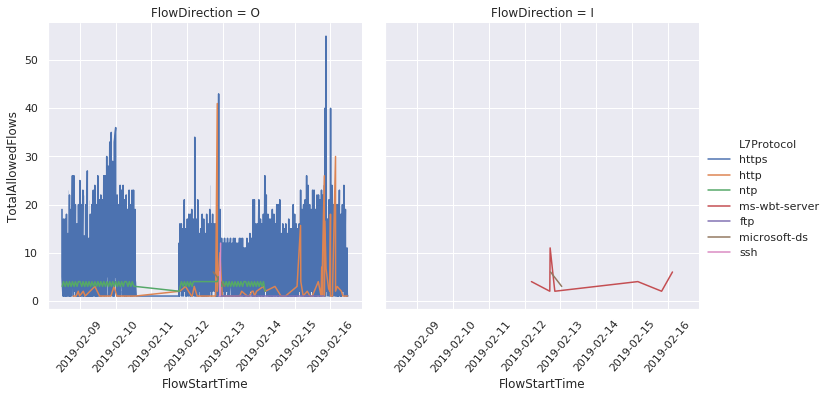

In [133]:
all_alert_host_ips = inv_host_entity.private_ips + inv_host_entity.public_ips
host_ips = {'\'{}\''.format(i.Address) for i in all_alert_host_ips}
alert_host_ip_list = ','.join(host_ips)

az_ip_where = f'''
| where (VMIPAddress in ({alert_host_ip_list}) 
        or SrcIP in ({alert_host_ip_list}) 
        or DestIP in ({alert_host_ip_list}) 
        ) and 
    (AllowedOutFlows > 0 or AllowedInFlows > 0)'''

az_net_query_byip = az_net_analytics_query.format(where_clause=az_ip_where,
                                                  start = ip_q_times.start,
                                                  end = ip_q_times.end)
print('getting data...')
%kql -query az_net_query_byip
az_net_comms_df = _kql_raw_result_.to_dataframe()

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    az_net_comms_df['TotalAllowedFlows'] = az_net_comms_df['AllowedOutFlows'] + az_net_comms_df['AllowedInFlows']
    sns.catplot(x="L7Protocol", y="TotalAllowedFlows", col="FlowDirection", data=az_net_comms_df)
    sns.relplot(x="FlowStartTime", y="TotalAllowedFlows", 
                col="FlowDirection", kind="line", 
                hue="L7Protocol", data=az_net_comms_df).set_xticklabels(rotation=50)

## Summary

- Microsoft Graph Security API - flexible queries and operations on **alert** data across different security services
  and respond to them via **security actions**.
- Azure Sentinel - Query API to allow drill-down into endpoint, network and service activity
- Jupyter Notebooks - allow to bring this data into a single location for analysis, correlation and visualization.








---

<a id='initialization'></a>[Go to start](#authenticate)

---

# Notebook Initialization
Run the following cell by clicking in the cell and hitting Shift+Enter

In [ ]:
# Sentinel setup
# Imports
import sys
import warnings

MIN_REQ_PYTHON = (3,6)
if sys.version_info < MIN_REQ_PYTHON:
    print('Check the Kernel->Change Kernel menu and ensure that Python 3.6')
    print('or later is selected as the active kernel.')
    sys.exit("Python %s.%s or later is required.\n" % MIN_REQ_PYTHON)

import numpy as np
from IPython import get_ipython
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 300)

import msticpy.sectools as sectools
import msticpy.nbtools as nbtools
import msticpy.nbtools.entityschema as entity
import msticpy.nbtools.kql as qry
import msticpy.nbtools.nbdisplay as nbdisp

# Some of our dependencies (networkx) still use deprecated Matplotlib
# APIs - we can't do anything about it so suppress them from view
from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter("ignore", category=MatplotlibDeprecationWarning)


# -------------------------------------------------------------------------
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License. 
# --------------------------------------------------------------------------

## https://aka.ms/graphsecuritydocs

import json
import urllib.request
import urllib.parse
import pandas as pd
import re
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

def get_secret(secret_name):
    return {'GRAPHSEC_DEMO_appId':'0b28a112-20ce-4e49-8071-343e875cfaed',
            'GRAPHSEC_DEMO_appSecret':'stlfIXHKEI3308)@zwlO8{@',
            'GRAPHSEC_DEMO_tenantId':'63d0b44f-8610-4dd2-91fd-541ffc973399',
            'VT_API_KEY':'<<optional VirusTotal API Key>>'}[secret_name]

SPLIT_DELIMS = '[\[\] ;\n\t|,xX"\']'
@register_line_cell_magic
def hash(line, cell=None):
    if cell is None:
        return line
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[a-f0-9]{32}$'
                           '|^[a-f0-9]{40}$'
                           '|^[a-f0-9]{64}$'
                           ,re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        
        return results           

# We delete these to avoid name conflicts for automagic to work
del hash 

@register_line_cell_magic
def vthash(line, cell=None):
    if cell is None:
        return MsftGraphSec_api.vtresults([line])
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[a-f0-9]{32}$'
                           '|^[a-f0-9]{40}$'
                           '|^[a-f0-9]{64}$'
                           ,re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        
        if len(results) == 0:
            return
        return MsftGraphSec_api.vtresults(results)
           

# We delete these to avoid name conflicts for automagic to work
del vthash 

@register_line_cell_magic
def graph_sec_file(line, cell=None):
    if cell is None:
        return MsftGraphSec_api.alerts(filehash=line)
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[a-f0-9]{32}$'
                           '|^[a-f0-9]{40}$'
                           '|^[a-f0-9]{64}$'
                           ,re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        
        if len(results) == 0:
            return
        dfs = []
        for filehash in results:
            dfs.append(MsftGraphSec_api.alerts(filehash=filehash))
        import pandas as pd
        return pd.concat(dfs)
            
# Delete these to avoid name conflicts for automagic to work
del graph_sec_file

@register_line_cell_magic
def graph_sec_machine(line, cell=None):
    if cell is None:
        if re.match('^[a-f0-9]{40}$', line):
            return MsftGraphSec_api.machines(machineid=line)
        else:
            return MsftGraphSec_api.machines(filterstr="$filter=ComputerDnsName eq '%s'" % line)
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[a-f0-9]{40}$',re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        
        dfs = []

        # if we did not get any machine Ids, treat them as ComputerDnsNames
        if len(results) == 0:
            results = cell.split('\n')
            for hostname in results:
                dfs.append(MsftGraphSec_api.machines(filterstr="$filter=ComputerDnsName eq '%s'" % hostname))
        else:
            for machine_id in results:
                dfs.append(MsftGraphSec_api.machines(machineid=machine_id))
        import pandas as pd
        return pd.concat(dfs)
            
# Delete these to avoid name conflicts for automagic to work
del graph_sec_machine 

@register_line_cell_magic
def graph_sec_alert(line, cell=None):
    if cell is None:
        return MsftGraphSec_api.alerts(alertid=line)
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[{(]?[0-9A-F]{8}[-]?(?:[0-9A-F]{4}[-]?){3}[0-9A-F]{12}[)}]?$',re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        if len(results) == 0:
            return
        dfs = []
        for alert_id in results:
            dfs.append(MsftGraphSec_api.alerts(alertid=alert_id))
        import pandas as pd
        return pd.concat(dfs)

# Delete these to avoid name conflicts for automagic to work
del graph_sec_alert 

@register_line_cell_magic
def graph_sec_ip(line, cell=None):
    if cell is None:
        return MsftGraphSec_api.ips(ip=line)
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$')
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        if len(results) == 0:
            return
        dfs = []
        for ip in results:
            dfs.append(MsftGraphSec_api.ips(ip=ip))
        import pandas as pd
        return pd.concat(dfs)
            
# Delete these to avoid name conflicts for automagic to work
del graph_sec_ip 
        
@register_line_cell_magic
def graph_sec_action(line, cell=None):
    if cell is None:
        return MsftGraphSec_api.ips(ip=line)
    else:    
        results = []
        for f in re.split(SPLIT_DELIMS,cell):
            p = re.compile('^[a-f0-9]{8}'
                       '-[a-f0-9]{4}'
                       '-[a-f0-9]{4}'
                       '-[a-f0-9]{4}'
                       '-[a-f0-9]{12}$'
                       ,re.IGNORECASE)
            if p.search(f) is not None:
                if not f in results:
                    results.append(f)
        if len(results) == 0:
            return
        dfs = []
        for action in results:
            dfs.append(MsftGraphSec_api.machine_actions(actionid = action))
        import pandas as pd
        return pd.concat(dfs)
            
# Delete these to avoid name conflicts for automagic to work
del graph_sec_action

    
class MicrosoftGraphSecurityAPI:
    def __init__(self, tenantId, appId, appSecret, vt_api_key=None, fUsePandas=True, 
                 api_root="https://graph.microsoft.com/", api_version="v1.0"):
        url = "https://login.microsoftonline.com/%s/oauth2/v2.0/token" % (tenantId)

        self.fDebug = False

        body = {
            'client_id' : appId,
            'client_secret' : appSecret,
            'grant_type' : 'client_credentials',
            'scope': 'https://graph.microsoft.com/.default'
        }

        ## authenticate and obtain AAD Token for future calls
        data = urllib.parse.urlencode(body).encode("utf-8")
        req = urllib.request.Request(url, data)
        response = urllib.request.urlopen(req)
        jsonResponse = json.loads(response.read().decode())
        self.aadToken = jsonResponse["access_token"]
        self.headers = { 
            'Content-Type' : 'application/json',
            'Accept' : 'application/json',
            'Authorization' : "Bearer " + self.aadToken
        }
        self.fUsePandas = fUsePandas # use pandas DataFrame for collections of objects, else return a list
        self.api_root = api_root + api_version 
        self.vt_api_key = vt_api_key
        if len(self.aadToken) > 0:
            print("Connected.")
    
    def set_output_type(self, fUsePandas=True):
        self.fUsePandas = fUsePandas    

    def set_debug_output(self, fDebug=True):
        self.fDebug = fDebug    
        
    def __validate_arguments(self,args, valid_params):
        if len(args) == 0:
            raise ValueError ('argument must be one of %s' % str(list(valid_params.keys())))
        elif len(args) > 1:
            raise ValueError ('only one id can be used at a time')
        else:
            selector = next(iter(args))
            selector_value= next(iter(args.values()))
            if selector not in list(valid_params.keys()):
                raise ValueError ('argument must be one of %s' % str(list(valid_params.keys())))
        return (selector, selector_value)

    def __make_request(self,url, params=None):
 
        if self.fDebug:
            print(url)
        req = urllib.request.Request(url, headers=self.headers)
        try:
            response = urllib.request.urlopen(req)
        except urllib.error.HTTPError as e:
            raise e
                
        jsonResponse = json.loads(response.read().decode())
        if type(jsonResponse) == int:
            if self.fUsePandas:
                return pd.DataFrame([jsonResponse])
            else:
                return jsonResponse
        if 'value' in jsonResponse:
            res = jsonResponse["value"]
            if len(res) == 0:
                res = {}
        else:
            res = jsonResponse     
        if self.fUsePandas:
            return pd.io.json.json_normalize(res)
        return res

    def __prepare_param_dict_from_filter_str(self, filterstr):
        get_params = {}
        for filter_param in re.split("[\?\&]+", filterstr):
            if len(filter_param)> 0:
                attr = filter_param.split('=')[0]
                val  = filter_param.split('=')[1]
                get_params[attr]= val
        return get_params
    
    def alerts(self, **kwargs):
        alert_url = self.api_root + "/security/alerts"
        get_params = None
        
        valid_params = {
            'filterstr' : alert_url + '?%s',
            'alertid'   : alert_url + '/%s',
            'userid'    : alert_url + "?$filter=userStates/any(d:d/userPrincipalName eq '%s')",
            'ip'        : alert_url + "?$filter=hostStates/any(d:d/privateIpAddress eq '%s')",
            'hostfqdn'  : alert_url + "?$filter=hostStates/any(d:d/fqdn eq '%s')", 
            'filehash'  : alert_url + "?$filter=fileStates/any(d:d/fileHash/hashValue eq '%s')",
            'filename'  : alert_url + "?$filter=fileStates/any(d:d/name eq '%s')", 
            'domain'    : alert_url + "?$filter=networkConnections/any(d:d/destinationDomain eq '%s')" 
        }
        (selector, selector_value) = self.__validate_arguments(kwargs, valid_params)
        
        if selector == 'filterstr':
            get_params = self.__prepare_param_dict_from_filter_str(selector_value)
            if get_params is not None:
                url = valid_params[selector] % urllib.parse.urlencode(get_params)
        else:
            url = valid_params[selector] % selector_value
            url = urllib.parse.quote( url , safe="%/:=&?~#+!$,;'@()*[]") # Url encode spaces 

        return self.__make_request(url)
    
    def update_alert(self, alertid=None, alertbody=None):
        import requests 

        alert_url = self.api_root + "/security/alerts"
        
        valid_params = {
            'alertid'   : alert_url + '/%s'
        }
        (selector, selector_value) = self.__validate_arguments(alertid, valid_params)
        
        if alertbody == None:
            raise ValueError ('Request body cannot be empty')
            
        headers = self.headers
        headers['Prefer'] = "return=representation"
        
        oldalert = self.alerts(alertid=alertid)
        
        
        url = valid_params[selector] % selector_value
        response = requests.patch(url, data, headers=headers)

        jsonResponse = response.json()

        if self.fUsePandas:
            return pd.io.json.json_normalize(jsonResponse)
        return r.json()

       
    def users(self, **kwargs):
        user_url = self.api_root + "/users"
        
        valid_params = {
            'userid'    : user_url + '/%s'
        }
        
        (selector, selector_value) = self.__validate_arguments(kwargs, valid_params)
        
        url = valid_params[selector] % selector_value

        return self.__make_request(url)
     
   
    def vtresults(self, hashlist):
        import requests 

        url = "https://www.virustotal.com/vtapi/v2/file/report"

        headers = {'User-Agent':'VirusTotal',
                    'Content-Type':'application/json'}
        if type(hashlist) == str:
            hashlist = [hashlist]
        
        data = {"resource": ','.join(hashlist),
                "apikey": self.vt_api_key}

        response = requests.get(url, data, headers=headers)

        jsonResponse = response.json()

        if self.fUsePandas:
            return pd.io.json.json_normalize(jsonResponse)
        return r.json()
    
print("Sample Microsoft Graph Security API code loaded")

def _print_process(process_row: pd.Series, fmt='html'):
    if process_row.NodeRole == 'parent':
        if process_row.Level > 1:
            level = 0
        else:
            level = 1
    elif process_row.NodeRole == 'source':
        level = 2
    elif process_row.NodeRole == 'child':
        level = 3 + process_row.Level
    else:
        level = 2

    px_spaces = 20 * level * 2
    txt_spaces = ' ' * (4 * level)
    
    font_col = ('red' 
                if process_row.NodeRole == 'source'
                else 'black')
        
    if fmt.lower() == 'html':
        l1_span = f'<span style="color:{font_col};font-size:90%">'
        line1_tmplt = (l1_span 
                       + '[{NodeRole}:lev{Level}] {TimeGenerated} '
                       + '<b>{NewProcessName}</b> '
                       + '[PID: {NewProcessId}, '
                       + 'SubjSess:{SubjectLogonId}, '
                       + 'TargSess:{TargetLogonId}]')
        line2_tmplt = 'Cmdline: "<b>{CommandLine}</b>") [Account: {Account}]</span>'
        output_tmplt = (f'<div style="margin-left:{px_spaces}px">'
                        + f'{{line1}}<br>{{line2}}</div>')

    else:
        line1_tmplt = ('[{NodeRole}:lev{Level}] {TimeGenerated} '
                       + '{NewProcessName} '
                       + '[PID: {NewProcessId}, '
                       + 'SubjSess:{SubjectLogonId}, '
                       + 'TargSess:{TargetLogonId}]')
        line2_tmplt = 'Cmdline: "{CommandLine}") [Account: {Account}]'
        output_tmplt = f'\n{txt_spaces}{{line1}}\n{txt_spaces}{{line2}}'
    line1 = line1_tmplt.format(**(process_row.to_dict()))
    line2 = line2_tmplt.format(**(process_row.to_dict()))

    return output_tmplt.format(line1=line1, line2=line2)


def display_process_tree(process_tree: pd.DataFrame, fmt='html'):
    """
    Display process tree data frame.

    Parameters
    ----------
    process_tree : pd.DataFrame
        Process tree DataFrame

    The display module expects the columns NodeRole and Level to
    be populated. NoteRole is one of: 'source', 'parent', 'child'
    or 'sibling'. Level indicates the 'hop' distance from the 'source'
    node.

    """
    tree = process_tree.sort_values(by=['TimeCreatedUtc'],
                                    ascending=True)
    
    if fmt.lower() == 'html':
        out_string = '<h3>Alert process tree:</h3>'
    else:
        out_string = 'Alert process tree:'
        out_string = out_string + '\n' + '_' * len(out_string)
    
    for _, line in tree.iterrows():
        out_string += _print_process(line, fmt)
        
    return out_string


from msticpy.sectools.geoip import GeoLiteLookup
iplocation = GeoLiteLookup()             


def lookup_host_ip_info(host_name):
    print('Looking for IP addresses of ', host_name)
    aznet_query = '''
    AzureNetworkAnalytics_CL 
    | where VirtualMachine_s has \'{host}\'
    | where ResourceType == 'NetworkInterface'
    | top 1 by TimeGenerated desc
    | project PrivateIPAddresses = PrivateIPAddresses_s, 
        PublicIPAddresses = PublicIPAddresses_s
    '''.format(host=host_name)
    %kql -query aznet_query
    az_net_df = _kql_raw_result_.to_dataframe()


    oms_heartbeat_query = '''
    Heartbeat
    | where Computer has \'{host}\'
    | top 1 by TimeGenerated desc nulls last
    | project ComputerIP, OSType, OSMajorVersion, OSMinorVersion, ResourceId, RemoteIPCountry, 
    RemoteIPLatitude, RemoteIPLongitude, SourceComputerId
    '''.format(host=host_name)
    %kql -query oms_heartbeat_query
    oms_heartbeat_df = _kql_raw_result_.to_dataframe()
    return az_net_df, oms_heartbeat_df


def convert_to_ip_entities(ip_str):
    ip_entities = []
    if ip_str:
        if ',' in ip_str:
            addrs = ip_str.split(',')
        elif ' ' in ip_str:
            addrs = ip_str.split(' ')
        else:
            addrs = [ip_str]
        for addr in addrs:
            ip_entity = entity.IpAddress()
            ip_entity.Address = addr.strip()
            iplocation.lookup_ip(ip_entity=ip_entity)
            ip_entities.append(ip_entity)
    return ip_entities

# Add this information to our inv_host_entity
def add_ip_data_to_host(inv_host_entity, az_net_df, oms_heartbeat_df):
    retrieved_address=[]
    if len(az_net_df) == 1:
        priv_addr_str = az_net_df['PrivateIPAddresses'].loc[0]
        inv_host_entity.properties['private_ips'] = convert_to_ip_entities(priv_addr_str)

        pub_addr_str = az_net_df['PublicIPAddresses'].loc[0]
        inv_host_entity.properties['public_ips'] = convert_to_ip_entities(pub_addr_str)
        retrieved_address = [ip.Address for ip in inv_host_entity.properties['public_ips']]
    else:
        if 'private_ips' not in inv_host_entity.properties:
            inv_host_entity.properties['private_ips'] = []
        if 'public_ips' not in inv_host_entity.properties:
            inv_host_entity.properties['public_ips'] = []

    if len(oms_heartbeat_df) == 1:
        if oms_heartbeat_df['ComputerIP'].loc[0]:
            oms_address = oms_heartbeat_df['ComputerIP'].loc[0]
            if oms_address not in retrieved_address:
                ip_entity = entity.IpAddress()
                ip_entity.Address = oms_address
                iplocation.lookup_ip(ip_entity=ip_entity)
                inv_host_entity.properties['public_ips'].append(ip_entity)

        inv_host_entity.OSFamily = oms_heartbeat_df['OSType'].loc[0]
        inv_host_entity.AdditionalData['OSMajorVersion'] = oms_heartbeat_df['OSMajorVersion'].loc[0]
        inv_host_entity.AdditionalData['OSMinorVersion'] = oms_heartbeat_df['OSMinorVersion'].loc[0]
        inv_host_entity.AdditionalData['SourceComputerId'] = oms_heartbeat_df['SourceComputerId'].loc[0]
    return retrieved_address

# Azure Network Analytics Base Query
az_net_analytics_query =r'''
AzureNetworkAnalytics_CL 
| where SubType_s == 'FlowLog'
| where FlowStartTime_t >= datetime({start})
| where FlowEndTime_t <= datetime({end})
| project TenantId, TimeGenerated, 
    FlowStartTime = FlowStartTime_t, 
    FlowEndTime = FlowEndTime_t, 
    FlowIntervalEndTime = FlowIntervalEndTime_t, 
    FlowType = FlowType_s,
    ResourceGroup = split(VM_s, '/')[0],
    VMName = split(VM_s, '/')[1],
    VMIPAddress = VMIP_s, 
    PublicIPs = extractall(@"([\d\.]+)[|\d]+", dynamic([1]), PublicIPs_s),
    SrcIP = SrcIP_s,
    DestIP = DestIP_s,
    ExtIP = iif(FlowDirection_s == 'I', SrcIP_s, DestIP_s),
    L4Protocol = L4Protocol_s, 
    L7Protocol = L7Protocol_s, 
    DestPort = DestPort_d, 
    FlowDirection = FlowDirection_s,
    AllowedOutFlows = AllowedOutFlows_d, 
    AllowedInFlows = AllowedInFlows_d,
    DeniedInFlows = DeniedInFlows_d, 
    DeniedOutFlows = DeniedOutFlows_d,
    RemoteRegion = AzureRegion_s,
    VMRegion = Region_s
| extend AllExtIPs = iif(isempty(PublicIPs), pack_array(ExtIP), 
                         iif(isempty(ExtIP), PublicIPs, array_concat(PublicIPs, pack_array(ExtIP)))
                         )
| project-away ExtIP
| mvexpand AllExtIPs
{where_clause}
'''